In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
my_color_palette =  {'Dz 1mg/kg':'#663399','Dz 3mg/kg':'#4AB2D6','Dz 5mg/kg':'#8FB996','Dz 7mg/kg':'#006594','NaCl':'#594157', 'PTZ 20mg/kg':'#c7991a'}

In [45]:
# Load data for an exemple animal
animal = "Ent_CamK2_09"
SP_df = pd.read_pickle('Mice_data/'+animal+'_all_SP')

In [46]:
# Parameters
all_diff_condition = np.unique(SP_df['Condition'])
time_window = 500 #ms
intensity = 1.0 #V
Sampling_freq = 2000 #Hz

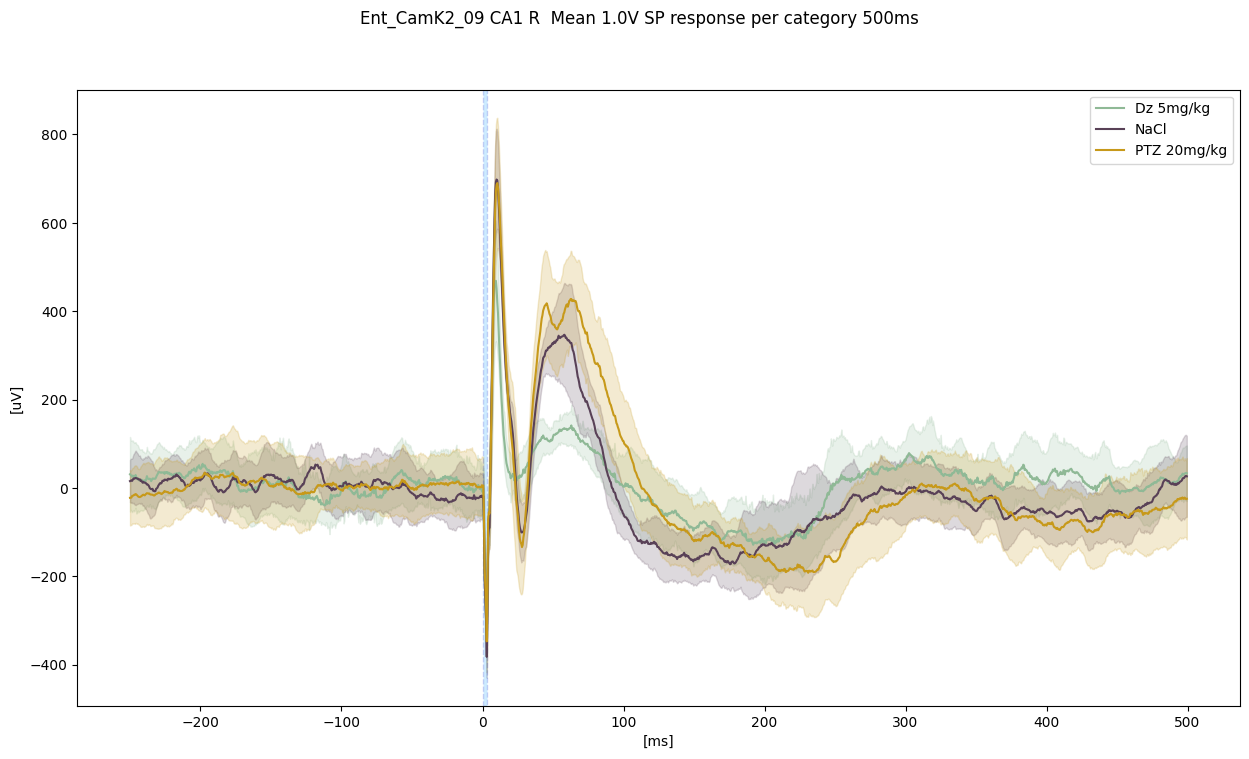

In [47]:
title = animal + " CA1 R " + " Mean " + str(intensity) +  "V SP response per category " + str(time_window) + 'ms'
fig1 = plt.figure(title, figsize=(15, 8)).suptitle(title)
gridspec.GridSpec(12, 12)
ax1 = plt.subplot2grid((12, 12), (0, 0), rowspan=12, colspan=12)
x = np.arange(-time_window / 2, time_window, 1000 / Sampling_freq)
for cnd in all_diff_condition:
    EEG_cnd = SP_df['EEG_'+ str(time_window)+'ms'][(SP_df['Condition'] == cnd)&(SP_df['Intensity[v]'] == intensity)]
    mean_EEG_cnd = np.mean(EEG_cnd,axis=0)
    SD_EEG_cnd = np.std(np.array(EEG_cnd), axis=0).flatten()

    color = my_color_palette[cnd]
    ax1.plot(x, mean_EEG_cnd, label=cnd ,color =color)
    ax1.fill_between(x, mean_EEG_cnd - SD_EEG_cnd,mean_EEG_cnd + SD_EEG_cnd, alpha=0.2, color = color)
ax1.axvspan(0, 3, edgecolor='#1B2ACC', facecolor='#089FFF', linestyle="--",alpha=0.2, lw=1)
ax1.set_xlabel('[ms]')
ax1.set_ylabel('[uV]')
ax1.legend()

plt.show()